# Project Desription
<u>**PROBLEM STATEMENT**</u> <i>(according to the data provider on Kaggle)</i>     

"A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -  

* The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners.  
* A sizeable department has to be maintained, for the purposes of recruiting new talent.  
* More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company.  

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away."  

<u>**GOAL OF THE PROJECT**</u>    

We are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.  

<u>**DATA SOURCE**</u>  

* FROM Kaggle - https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study



# Importing libraries
**Okay so prima facie, lets import some of the libraries we will be needing for this project.**  
(even if we are missing out on some library, we can always import it later on in the project.)

In [0]:
import sys

# library to handle vectorized data 
import numpy as np 
# library for data analsysis and manupulation
import pandas as pd 
# so that the output is not trunacated by pandas when we actually want to see it 
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100000)

# for visualisations
import seaborn as sns

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


# Mounting the drive, to access the data.

In [308]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [309]:
%ls

code_file.ipynb  data_files/  README.md


In [310]:
%cd /content/drive/My Drive/Github_projects/HR_analytics_project

/content/drive/My Drive/Github_projects/HR_analytics_project


# Loading the data : 

The data that we have for this project is as follows :
(for the features see the included data dictionary).

* **employee_survey_data** - This file conatins the survey results of the employees on the following features.
* **general_data** - This file contain general data about employees.
* **in_time** - This file contains employee login time details.
* **out_time** - This file contains employees logout time details.
* **manager_survey_data** - This file contains employees feedback survey about their managers.

In [0]:
employee_survey_data = pd.read_csv('data_files/employee_survey_data.csv')
general_data = pd.read_csv('data_files/general_data.csv')
in_time = pd.read_csv('data_files/in_time.csv')
out_time = pd.read_csv('data_files/out_time.csv')
manager_survey_data = pd.read_csv('data_files/manager_survey_data.csv')

In [312]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [313]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [314]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [315]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

In [316]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [317]:
print('''<b>The shapes of our data files are as follows :</b> 
        \nemployee_survey_data : {}
        \ngeneral_data : {}
        \nmanager_survey_data : {}
        \nin_time : {}
        \nout_time : {}
      '''.format(employee_survey_data.shape, 
                 general_data.shape,
                 manager_survey_data.shape, 
                 in_time.shape, 
                 out_time.shape))

<b>The shapes of our data files are as follows :</b> 
        
employee_survey_data : (4410, 4)
        
general_data : (4410, 24)
        
manager_survey_data : (4410, 3)
        
in_time : (4410, 262)
        
out_time : (4410, 262)
      


## Merging our datasets together.

In [318]:
data = employee_survey_data.merge(general_data.merge(manager_survey_data, on='EmployeeID'), on='EmployeeID')
print(data.shape)
data.head()

(4410, 29)


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3


# Exploing the datasets 'in_time' and 'out_time'.

**The datasets 'in_tine' and 'out_time' are the employee login and logout times respectively, on the working dates in the year of 2015.**  
**The column 'Unnamed: 0' in both of the above mentioned datasets, refer to the employee ID of an employee.**  
**We can clearly see the presence of null values in these two datasets from above. Let's check for null values for these two datasets.**

In [0]:
import missingno as msno

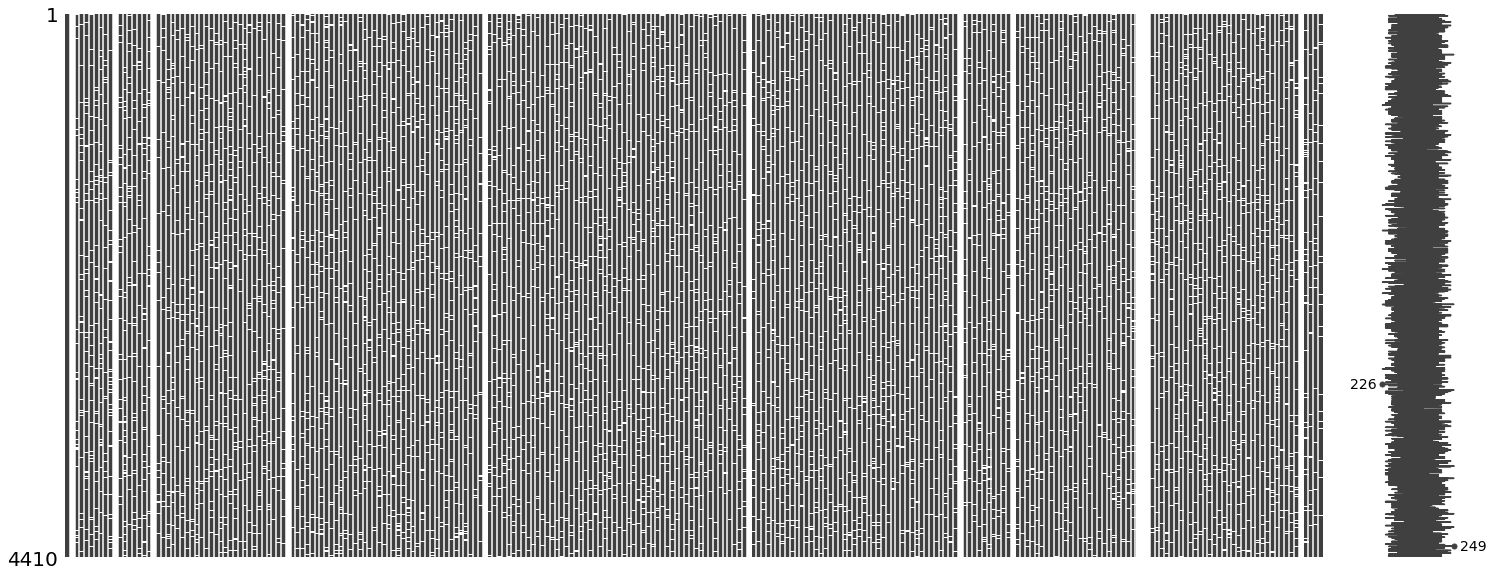

In [320]:
msno.matrix(in_time)

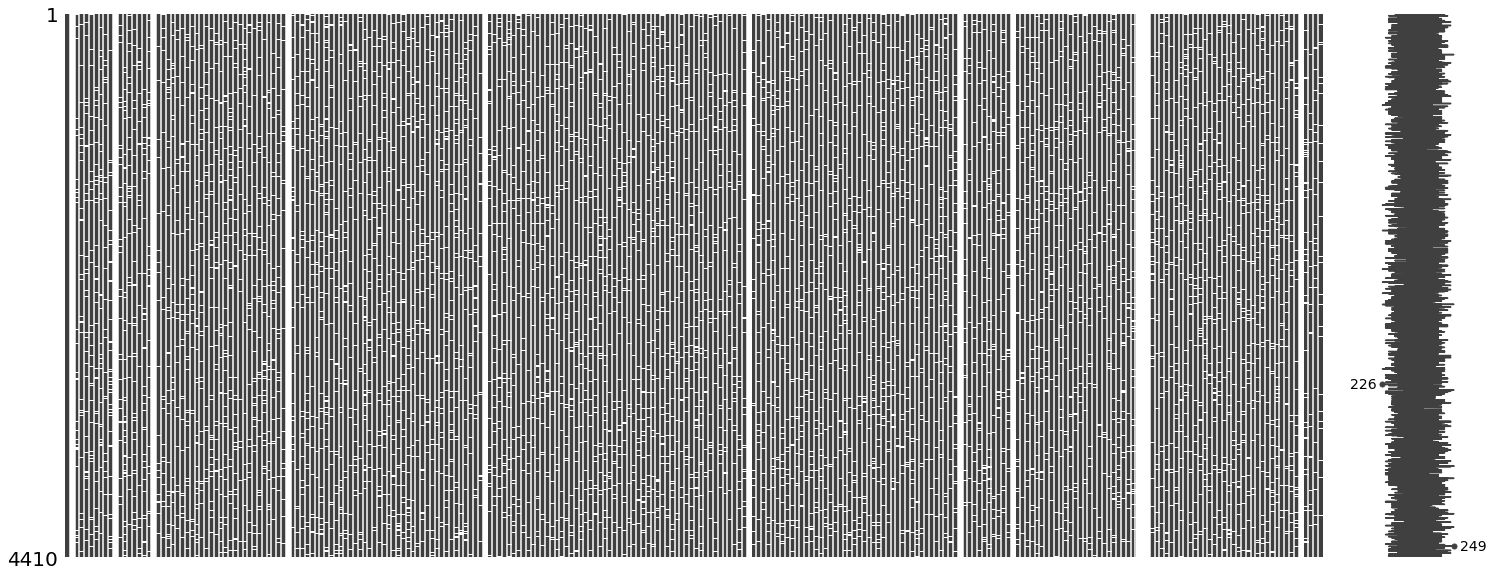

In [321]:
msno.matrix(out_time)

**We can clearly see that these two datsets are highly fragmented due to the presence of null values.**  
**The existence of these null-valus in these two datsets can represent the following -**  
* If there are null-values for an employee for both log-in and log-out time, then :
   * either the employee was absent in the office for the day.
   * or the data for that employee for that day was not collected.  

As the first option is more probable in a given scenario, we will be assuming the same for our analysis.

* If there are null-values for all the employees in a given day, then we can harmlessly assume for our analysis that the office was not operatinal on that day, and we can drop that column(i.e. that day) from both the datasets.

* If there are null-value for only login or logout time for an employee, then for our analysis we can assume that data was somehow lost, and in such cases we can replace it with the most frequent login or logout time for that employee in the year.



**Renaming the 'Unnamed: 0' column in the datasets 'in_time' and 'out_time', to match the other datasets.**

In [0]:
in_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
out_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)

**Let's check the value representation in these two datasets.**

In [323]:
print("The login and logout time for the employee with ID 465 on {} are {} and {} respectively ".format((list(in_time.columns))[35], in_time.iloc[465, 35], out_time.iloc[465, 35]))

The login and logout time for the employee with ID 465 on 2015-02-18 are 2015-02-18 10:04:44 and 2015-02-18 16:46:19 respectively 


**Setting the column of 'EmployeeID' in these two datasets, in order to prevent any kind of opertion or transformation effecting them.**

In [0]:
in_time.set_index('EmployeeID', inplace=True)
out_time.set_index('EmployeeID', inplace=True)
# Convertig the values in in_time and out_time to datetime
in_time = in_time.apply(pd.to_datetime)
out_time = out_time.apply(pd.to_datetime)

**Let's compute the total logged hours worked by an employee through the year on a day to day basis.**

In [0]:
working_time = out_time - in_time

In [326]:
working_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaT,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,NaT,07:20:49,07:16:03,NaT,06:46:33,07:05:42,07:03:02,07:36:17,NaT,07:37:45,07:07:08,07:24:49,06:50:59,06:54:06,07:12:11,07:36:19,07:33:55,07:28:12,07:36:05,07:16:02,07:11:35,07:26:07,07:12:19,07:36:21,07:24:58,07:50:23,NaT,07:49:56,07:26:28,07:13:30,07:35:01,07:12:03,07:23:09,07:09:25,06:45:35,07:44:40,NaT,07:48:54,07:24:31,06:55:23,07:09:40,07:04:48,07:18:37,NaT,06:54:54,07:11:52,07:50:52,07:09:45,07:36:59,07:15:07,07:26:44,NaT,07:33:21,07:21:25,07:51:54,07:20:13,07:39:31,07:11:16,07:02:27,07:38:24,07:25:38,07:48:11,07:06:57,07:20:53,07:08:48,07:27:35,07:45:25,07:17:05,07:41:43,06:58:32,07:31:30,07:20:11,07:33:45,07:14:31,07:53:21,07:41:30,07:30:29,NaT,07:24:38,07:18:31,07:27:24,07:03:46,07:36:54,NaT,07:26:41,07:30:09,07:54:06,06:49:01,NaT,07:19:59,07:19:10,07:27:55,

In [327]:
# the number of working days are
working_time.shape[1]

261

In [0]:
from datetime import date

In [0]:
months = pd.DataFrame(working_time.columns).apply(pd.to_datetime)
for i in range(0, len(months)):
  months.iloc[i, 0] = datetime.date(months[0][i]).strftime('%B')

In [0]:
for i in range(0, len(months)):
  working_time.rename(columns={working_time.columns[i]:months[0][i]}, inplace=True)

In [331]:
working_time.head()

,January,January,January,January,January,January,January,January,January,January,January,January,January,January,January,January,January,January,January,January,January,January,February,February,February,February,February,February,February,February,February,February,February,February,February,February,February,February,February,February,February,February,March,March,March,March,March,March,March,March,March,March,March,March,March,March,March,March,March,March,March,March,March,March,April,April,April,April,April,April,April,April,April,April,April,April,April,April,April,April,April,April,April,April,April,April,May,May,May,May,May,May,May,May,May,May,May,May,May,May,May,May,May,May,May,May,May,June,June,June,June,June,June,June,June,June,June,June,June,June,June,June,June,June,June,June,June,June,June,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,August,August,August,August,August,August,August,August,August,August,August,August,August,August,August,August,August,August,August,August,August,September,September,September,September,September,September,September,September,September,September,September,September,September,September,September,September,September,September,September,September,September,September,October,October,October,October,October,October,October,October,October,October,October,October,October,October,October,October,October,October,October,October,October,October,November,November,November,November,November,November,November,November,November,November,November,November,November,November,November,November,November,November,November,November,November,December,December,December,December,December,December,December,December,December,December,December,December,December,December,December,December,December,December,December,December,December,December,December
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaT,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,NaT,07:20:49,07:16:03,NaT,06:46:33,07:05:42,07:03:02,07:36:17,NaT,07:37:45,07:07:08,07:24:49,06:50:59,06:54:06,07:12:11,07:36:19,07:33:55,07:28:12,07:36:05,07:16:02,07:11:35,07:26:07,07:12:19,07:36:21,07:24:58,07:50:23,NaT,07:49:56,07:26:28,07:13:30,07:35:01,07:12:03,07:23:09,07:09:25,06:45:35,07:44:40,NaT,07:48:54,07:24:31,06:55:23,07:09:40,07:04:48,07:18:37,NaT,06:54:54,07:11:52,07:50:52,07:09:45,07:36:59,07:15:07,07:26:44,NaT,07:33:21,07:21:25,07:51:54,07:20:13,07:39:31,07:11:16,07:02:27,07:38:24,07:25:38,07:48:11,07:06:57,07:20:53,07:08:48,07:27:35,07:45:25,07:17:05,07:41:43,06:58:32,07:31:30,07:20:11,07:33:45,07:14:31,07:53:21,07:41:30,07:30:29,NaT,07:24:38,07:18:31,07:27:24,07:03:46,07:36:54,NaT,07:26:41,07:30:09,07:54:06,06:49:01,NaT,07:19:59,07:19:10,07:27:55,07:07:44,07:34:23,07:11:59,07:52:40,07:26:52,NaT,NaT,07:43:02,07:30:51,07:02:31,NaT,07:04:22,NaT,07:04:31,07:34:30,07:25:17,07:35:43,07:32:32,07:31:34,07:31:17,07:14:56,07:10:42,06:54:46,07:06:46,07:45:13,07:03:08,07:39:42,07:18:11,07:43:25,07:37:06,07:09:32,07:56:51,07:39:05,07:29:33,06:56:13,07:22:07,07:16:35,07:07:40,07:37:28,07:16:26,NaT,07:05:14,07:15:14,07:52:44,06:40:54,07:28:50,07:28:24,06:42:18,07:08:55,07:13:56,07:22:50,06:56:58,07:10:44,07:40:29,07:30:20,07:25:29,07:36:14,07:31:32,07:36:39,07:22:08,07:08:30,07:03:20,07:37:42,06:55:15,07:13:09,07:43:51,07:29:19,07:25:00,07:42:13,07:41:20,07:33:17,07:00:12,NaT,07:11:14,07:26:01,07:31:46,07:23:00,07:20:39,07:31:48,07:22:34,07:20:03,06:52:06,07:08:02,07:20:00,NaT,07:27:08,07:25:50,07:39:14,07:02:38,07:19:14,07:43:56,07:38:40,07:35:32,07:22:02,07:47:16,NaT,07:01:41,07:40:51,07:23:55,07:29:17,07:36:20,07:09:38,NaT,07:29:19,07:34:22,06:49:19,07:32:50,07:02:18,NaT,NaT,07:10:13,07:44:46,07:03:03,07:42:12,07:07:07,07:18:47,06:51:45,07:35

In [0]:
month_dict = {'January_month': 'January',
              'February_month' : 'February',
              'March_month' : 'March',
              'April_month' : 'April',
              'May_month' : 'May',
              'June_month' : 'June',
              'July_month' : 'July',
              'August_month' : 'August',
              'September_month' : 'September',
              'October_month' : 'October',
              'November_month' : 'November',
              'December_month': 'December'}
for i in range(0, 12):
  working_time[list(month_dict.keys())[i]] = working_time[month_dict[list(month_dict.keys())[i]]].sum(axis = 1)
  working_time.drop((month_dict[list(month_dict.keys())[i]]), axis = 1, inplace = True)

In [333]:
working_time.head()

,January_month,February_month,March_month,April_month,May_month,June_month,July_month,August_month,September_month,October_month,November_month,December_month
EmployeeID,,,,,,,,,,,,
1,5 days 10:50:08,5 days 20:58:40,5 days 19:34:26,6 days 19:37:55,5 days 05:51:52,5 days 19:49:34,6 days 17:31:20,6 days 11:23:41,6 days 03:41:27,5 days 12:43:14,5 days 11:30:04,5 days 21:08:52
2,5 days 14:58:33,6 days 03:56:15,6 days 09:06:03,6 days 18:13:42,5 days 18:59:57,6 days 18:50:57,6 days 10:37:13,6 days 19:07:36,6 days 09:52:49,6 days 10:06:39,5 days 12:02:50,6 days 19:48:02
3,5 days 13:23:55,5 days 18:32:54,5 days 13:24:30,6 days 05:33:49,5 days 18:36:39,6 days 02:58:24,6 days 12:00:45,5 days 18:08:07,6 days 05:03:51,6 days 02:35:51,4 days 23:16:14,6 days 03:37:16
4,5 days 14:06:53,5 days 15:21:37,5 days 09:18:01,6 days 05:52:11,5 days 18:07:07,6 days 15:29:28,6 days 09:28:39,5 days 10:01:00,5 days 23:53:33,5 days 15:36:21,5 days 02:15:46,6 days 15:00:16
5,5 days 23:48:24,6 days 15:50:13,6 days 23:19:57,6 days 23:38:12,6 days 16:37:23,7 days 00:54:32,7 days 06:07:53,6 days 15:44:25,7 days 01:24:55,7 days 00:48:02,6 days 01:37:42,7 days 07:39:08


In [0]:
for c in range(0, ((working_time.shape)[1])) : 
  for r in range (0, ((working_time.shape)[0])) :
    working_time.iloc[r, c] = round(((working_time.iloc[r, c])/pd.Timedelta('1 hour')), 2)

In [335]:
working_time.head()

,January_month,February_month,March_month,April_month,May_month,June_month,July_month,August_month,September_month,October_month,November_month,December_month
EmployeeID,,,,,,,,,,,,
1,130.84,140.98,139.57,163.63,125.86,139.83,161.52,155.39,147.69,132.72,131.5,141.15
2,134.98,147.94,153.1,162.23,139,162.85,154.62,163.13,153.88,154.11,132.05,163.8
3,133.4,138.55,133.41,149.56,138.61,146.97,156.01,138.14,149.06,146.6,119.27,147.62
4,134.11,135.36,129.3,149.87,138.12,159.49,153.48,130.02,143.89,135.61,122.26,159
5,143.81,159.84,167.33,167.64,160.62,168.91,174.13,159.74,169.42,168.8,145.63,175.65
